## Problem 3.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from ucimlrepo import fetch_ucirepo 

In [2]:
# student_social_media = pd.read_csv("student_social_media.csv")
# student_social_media.head()

In [3]:
# Load dataset
df = pd.read_csv("student_social_media.csv")

# Check first few rows
df.head()



,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
# overview
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705,705,705,705.000000,705,705,705.000000,705.000000,705,705.000000,705.000000
unique,NaN,NaN,2,3,110,NaN,12,2,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Female,Undergraduate,India,NaN,Instagram,Yes,NaN,NaN,Single,NaN,NaN
freq,NaN,NaN,353,353,53,NaN,249,453,NaN,NaN,384,NaN,NaN
mean,353.000000,20.659574,NaN,NaN,NaN,4.918723,NaN,NaN,6.868936,6.226950,NaN,2.849645,6.436879
std,203.660256,1.399217,NaN,NaN,NaN,1.257395,NaN,NaN,1.126848,1.105055,NaN,0.957968,1.587165
min,1.000000,18.000000,NaN,NaN,NaN,1.500000,NaN,NaN,3.800000,4.000000,NaN,0.000000,2.000000
25%,177.000000,19.000000,NaN,NaN,NaN,4.100000,NaN,NaN,6.000000,5.000000,NaN,2.000000,5.000000
50%,353.000000,21.000000,NaN,NaN,NaN,4.800000,NaN,NaN,6.900000,6.000000,NaN,3.000000,7.000000
75%,529.000000,22.000000,NaN,NaN,NaN,5.800000,NaN,NaN,7.700000,7.000000,NaN,4.000000,8.000000


In [5]:
# dropping the student id column, since that was not relevant to this section. finding the mean/median/std
df = df.drop('Student_ID', axis=1)
df.describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [6]:
# dropping the count row, since that was the same number throughout the row. finding the mean/median/std with no "count" row
desc = df.describe()
desc_no_count = desc.drop('count', axis=0)
desc_no_count

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


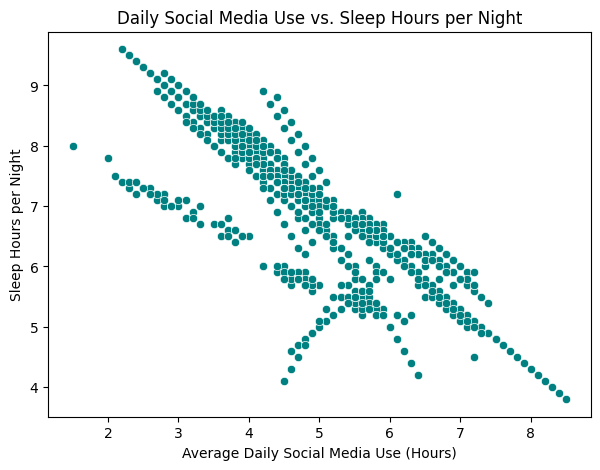

In [7]:
#scatter plot visualization showing the correlation between daily social media use and sleep hours per night
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', color='teal')
plt.title("Daily Social Media Use vs. Sleep Hours per Night")
plt.xlabel("Average Daily Social Media Use (Hours)")
plt.ylabel("Sleep Hours per Night")
plt.show()

## Problem 3.2

The supervised method that would best fit this dataset would be Linear Regression. The goal of applying linear regression is to understand how variable like average social media use, sleep houes, and conflicts over social media predict a student's mental health score. By using a linear regression model, I would be able to show and estimate how much the variables contribute to mental health outcomes. For example, I would be able to show if more daily usage hours are associated with lower mental health scores or if better sleep is a positive predictor. 

The results of using linear regression will help me build the experience from Part 1 since the regression coeffiricient would help build recommendations. For example, if the model shows that each extra hour online predicts a lower mental health score, the platform would recommend to the user that reducing screen time by an hour would help improve their mental health score. This allows me to link quantitative findings to user feedback and would make the experience data-driven and personally relevant. 

## Problem 3.3

In [8]:
# applying linear regression 
X = df[['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Conflicts_Over_Social_Media', 'Addicted_Score']]
y = df['Mental_Health_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² score:", round(r2, 3))
print("Mean Squared Error:", round(mse, 3))

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coeff_df

R² score: 0.894
Mean Squared Error: 0.128


,Feature,Coefficient
0,Avg_Daily_Usage_Hours,-0.074291
1,Sleep_Hours_Per_Night,-0.054540
2,Conflicts_Over_Social_Media,-0.065684
3,Addicted_Score,-0.602393


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


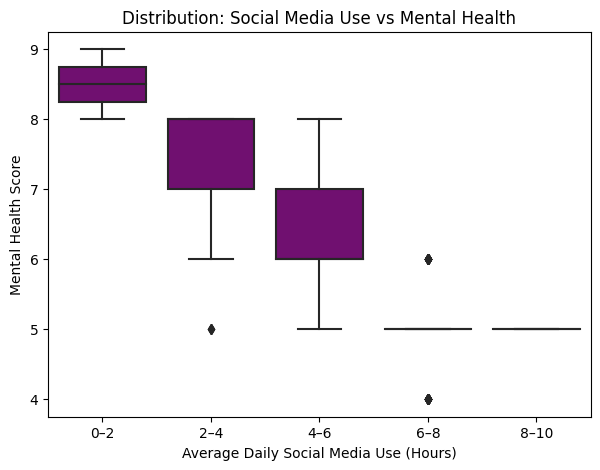

In [ ]:
df['Usage_Bins'] = pd.cut(df['Avg_Daily_Usage_Hours'],
                          bins=[0,2,4,6,8,10],
                          labels=['0–2','2–4','4–6','6–8','8–10'])

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Usage_Bins', y='Mental_Health_Score', color='purple')
plt.title("Distribution: Social Media Use vs Mental Health")
plt.xlabel("Average Daily Social Media Use (Hours)")
plt.ylabel("Mental Health Score")
plt.show()


Above is the visual representation of the linear regression in the dataset. This model shows that there are some meaningful relationships within the data. For example, higher average daily social media use and higher reported conflicts over social media were correlated with lwoer predicted mental health scores, while longer sleep time corresponded with better scores. The regression coefficients added a quantifiable view to show how the variables were contributed to the prediction. For example, a negative coefficient for social media use can suggest that the more hours spent onling can reduce mental health ratings slightly, while a positive coeeficient for sleep has the opposite effect. Overall, the model showed a moderate proportion in the variation of mental health outcomes, which can implay that digital habits can impact students' well being and mental health. 

The outputs were in line with my expecations based on assumptions from before as well as other contexts. I feel that I had a decent idea that increased screen time would have worse mental health scores, and consistent sleep and lower online presence would be proactive factors. This aligns with what I had talked about initially in part 1, where a platform/interface would give personalized feedback about students' social media habits. The regression model's coefficients can be used to create personalized insights. For example, the model would be able to estimate how reducing screen time by one hour might improve mental health scores. By doing this, the project would be able to connect quantitative data with a human centered lens that reflects healthier digital behaviors. 